# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Rafa Muhammad Ghifar Ramadhan]
- **Email:** [rafaa.muhammadd@gmail.com]
- **ID Dicoding:** [rafamuhmmad]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Is there an effect of the season on bike rentals ?
- Pertanyaan 2 : How Impactful is Temperature on Bike Rentals?

## Import Semua Packages/Library yang Digunakan

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
#read Data
day_df = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/Bike-sharing-dataset/hour.csv')

In [34]:
# Peek the dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,344.167,363.625,805.833,160.446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,363.478,353.739,696.087,248.539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,196.364,189.405,437.273,248.309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,212.122,590.435,160.296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,226.957,22.927,436.957,1.869,82,1518,1600


In [35]:
# Peek the dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,2.879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,2.727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,2.727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,2.879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,2.879,0.75,0.0,0,1,1


### Assessing Data

In [36]:
# Check the information
print("Dataset size:", day_df.shape)
print("Dataset info:")
print(day_df.info())

Dataset size: (731, 16)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [37]:
# Check the information
print("Dataset size:", hour_df.shape)
print("Dataset info:")
print(hour_df.info())

Dataset size: (17379, 17)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


**Checking Mising Value**

In [38]:
# Check missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [39]:
# Check missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Checking Duplicated Data**

In [40]:
# Check the duplicated data
day_df.duplicated().sum()

0

In [41]:
# Check the duplicated data
hour_df.duplicated().sum()

0

### Cleaning Data


In [42]:
# Cleaning Data for day_df

# Convert 'dteday' to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [43]:
# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)

In [44]:
# Correct data types for categorical variables
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [45]:
# Remove any duplicate rows if they exist
day_df.drop_duplicates(inplace=True)

In [46]:
# Cleaning Data for hour_df

# Convert 'dteday' to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [47]:
# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)

In [48]:
# Correct data types for categorical variables and correct any wrong data types
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [49]:
# Assume 'hr' should be of type 'category' because it represents hours of the day
hour_df['hr'] = hour_df['hr'].astype('category')

In [50]:
# Remove any duplicate rows if they exist
hour_df.drop_duplicates(inplace=True)

In [51]:
# Display DataFrame to verify changes
display(day_df.head())
display(hour_df.head())

# Display the shape to see if any rows were dropped
print(day_df.shape)
print(hour_df.shape)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,344.167,363.625,805.833,160.446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,363.478,353.739,696.087,248.539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,196.364,189.405,437.273,248.309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,212.122,590.435,160.296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,226.957,22.927,436.957,1.869,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,2.879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,2.727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,2.727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,2.879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,2.879,0.75,0.0,0,1,1


(731, 16)
(17379, 17)


## Exploratory Data Analysis (EDA)

**Grouping Data by Season**

In [54]:
aggregated_data = day_df.groupby('season', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_data = aggregated_data.reset_index()
print(aggregated_data)

  season  Max Count  Min Count  Average Count  Total Count
0      1       7836        431    2604.132597       471348
1      2       8362        795    4992.331522       918589
2      3       8714       1115    5644.303191      1061129
3      4       8555         22    4728.162921       841613


**Grouping Data by weathersit**

In [55]:
# Grouping data by 'weathersit' and calculating statistics for 'cnt'
weather_aggregated_data = day_df.groupby('weathersit', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})

# Setting more descriptive column names for the resulting DataFrame
weather_aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']

# Resetting the index so that 'weathersit' becomes a regular column and no longer the index
weather_aggregated_data = weather_aggregated_data.reset_index()

# Displaying the resulting DataFrame
print(weather_aggregated_data)

  weathersit  Max Count  Min Count  Average Count  Total Count
0          1       8714        431    4876.786177      2257952
1          2       8362        605    4035.862348       996858
2          3       4639         22    1803.285714        37869


## Visualization & Explanatory Analysis

### Pertanyaan 1: Is there an effect of the season on bike rentals

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


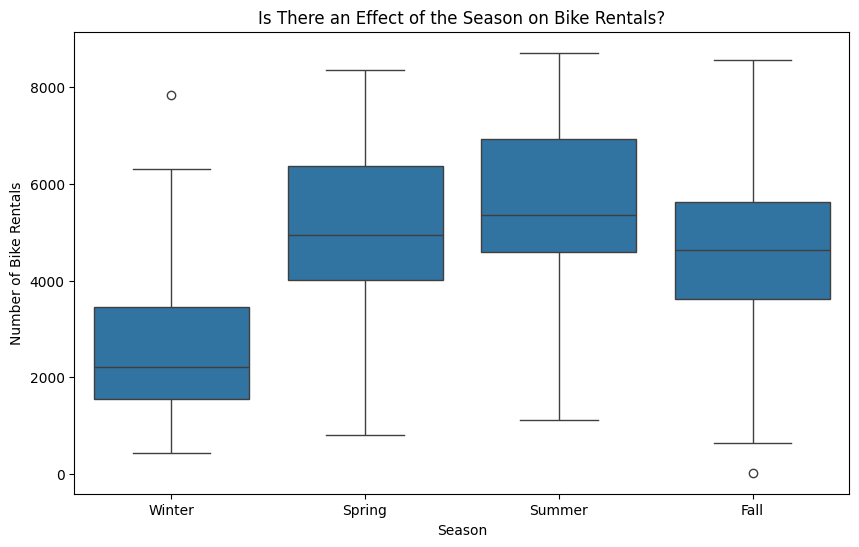

In [61]:
# Visualization: Is there an effect of the season on bike rentals?
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Is There an Effect of the Season on Bike Rentals?')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()


### Pertanyaan 2: How Impactful is Temperature on Bike Rentals?

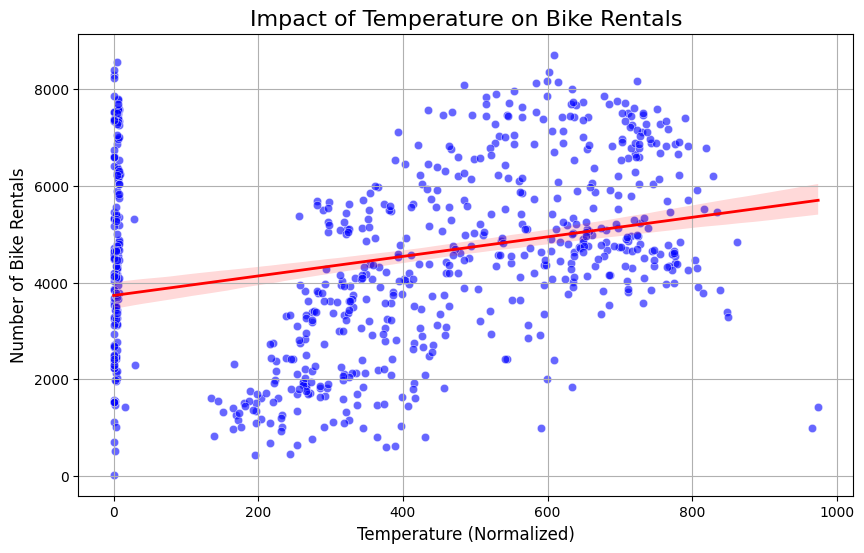

In [63]:
# Improved visualization for the relationship between temperature and bike rentals
plt.figure(figsize=(10, 6))

# Scatter plot with better aesthetics
sns.scatterplot(x='temp', y='cnt', data=day_df, color='b', alpha=0.6)

# Adding a trend line to visualize the general trend (optional)
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='r', line_kws={"lw":2})

# Adding a title and labels with a larger font for clarity
plt.title('Impact of Temperature on Bike Rentals', fontsize=16)
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Number of Bike Rentals', fontsize=12)

# Grid for easier reading
plt.grid(True)

# Display the plot
plt.show()

## Conclusion

- Conclution pertanyaan 1 ( Is there an effect of the season on bike rentals ):
Based on the visualization, it is evident that summer has the highest number of bike rentals, with a higher median compared to other seasons. This indicates that summer is the most popular time for bike rentals, likely due to the warmer weather conditions that make cycling more comfortable and enjoyable.

- Conclution pertanyaan 2 (How Impactful is Temperature on Bike Rentals?) :
The visualization illustrates a clear relationship between temperature and bike rentals. As the temperature increases, the number of bike rentals also tends to rise, which is evident from the upward trend line. This suggests that higher temperatures positively influence bike rental activity, likely because warmer weather encourages more people to engage in outdoor activities like cycling. The scatter plot highlights this correlation, indicating that warmer days are associated with an increase in bike rentals.